# Project 2: Handwritten Digit Recognition with a Simple CNN

## Project Overview

This project focuses on the development and understanding of a Convolutional Neural Network (CNN) for recognizing handwritten digits using the MNIST dataset. It is structured to provide a comprehensive introduction to deep learning techniques and their practical applications. Participants will engage in:

* **Setting up a Python project environment**, emphasizing the importance of virtual environments for effective dependency management in machine learning initiatives.
* **Performing data collection and preprocessing**, which includes normalization, reshaping, and batching of image data, essential steps for the successful application of machine learning models.
* **Designing and refining a CNN architecture**, where participants will gain hands-on experience in neural network design, layer configuration, and model compilation specific to image recognition tasks.
* **Conducting model training and evaluation**, teaching participants to apply training procedures, assess performance metrics, and gauge model accuracy on test data.
* **Executing results analysis and model optimization**, aimed at enhancing model performance through methods such as hyperparameter tuning and data augmentation, while mitigating common issues like overfitting.
* **Preparing the model for deployment**, which covers model conversion for production environments, development of an interaction interface, and comprehensive project documentation for future scalability and reproducibility.

The project aims to build proficiency in utilizing TensorFlow and Keras, equipping participants with the necessary skills to develop, train, and deploy effective machine learning models. Emphasis is placed on following best practices for machine learning project workflows, from data preprocessing to deployment, ensuring participants are well-prepared to handle a variety of data science challenges.

**Estimated Completion Time**

12 to 14 hours


## Project Authors

**Authors**: 
        
        Tim Tieng, Arvind Krishnan
        Tech Excellence Advanced Data Science Program 2024

## Task 1: Project Setup and Environment Preparation

**Objective:** Set up the project environment and install necessary libraries to ensure a smooth workflow.

**Activities:**

1. Install Python and necessary libraries (NumPy, TensorFlow/Keras, Matplotlib, etc.).
2. Set up a virtual environment for the project to manage dependencies.
3. Verify the installation by running a simple Python script.

**Estimated Completion Time:** 60 minutes

### Steps Taken for Environment Setup

1. **Pyenv Installation** - We confirmed as a group that we have the package 'pyenv', 'virtualenv' installed locally to our machines. This allows us to make setup virtual environments to manage this project
2. **Project Folder Creation** - Additionally, we made sure that we have the same folder structure for project 2. We ensured that we have the following directories present/created on our local machines: Config, Data, Notebooks. This can be updated as the project progresses.
3. ***Virtual Environment Creation** - As a team, we confirmed to work on a stable version of Python **Python 3.10.13**. To accomplish this, we ran the following commands:
        
        pyenv install 3.10.13
        pyenv virtualenv 3.10.13 TechEx_Project2
        pyenv activate TechEx_Project2

        conda create -n TechEx_Project2 python= 3.10.13
        conda activate TechEx_Project2
        
4. **Package Installation** - To ensure both local machines have all the required packages, we created a "requirements" text file that was added to our "Config" folder. This text file has the package names required to compelte this project. To install the packages outlined in the **pip_requirements.txt** file, we rand the following command in our local terminals within the "Config" folder:
        
        pip install -r pip_requirements.txt

In [ ]:
# !pip install hyperopt mlflow

In [1]:
# Import Pacakges

# Data Manipulation Packages
import datetime as dt
import numpy as np
import os
import pandas as pd
import scipy

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms, Model Preprocessing
import feature_engine
from feature_engine.encoding import OrdinalEncoder
from feature_engine.transformation import YeoJohnsonTransformer
import statsmodels.api as sm
from scipy.stats import anderson, chi2_contingency
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Deep Learning
import keras
from keras import layers
from keras.layers import RandomFlip, RandomRotation, Rescaling, BatchNormalization, Conv2D, MaxPooling2D, Dense, Input
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Model Optimization and Hyperparameter Tuning
import hyperopt
import mlflow
from hyperopt import STATUS_OK, Trials, fmin, tpe, hp

import tensorboard

In [2]:
# Check for TensorFlow GPU access (Silicon macbook code block to enable GPU)
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
TensorFlow version: 2.16.1


## **Task 2: Data Collection and Preprocessing**  

**Objective:** Gather and prepare the handwritten digits data for training and testing the CNN.  

**Activities:**  
1. Download the MNIST dataset.  
2. Normalize the image pixel values and reshape them for the CNN.  
3. Split the data into training, validation, and testing sets.  
4. Perform data augmentation to increase the diversity of the training set (e.g., rotations, translations).  
5. Implement data loaders for efficient loading and batching operations during training.  
6. Visualize the augmented images to verify the data augmentation process.  
7. Save the preprocessed data for easy access in subsequent training sessions.

**Estimated Completion Time:** 180 minutes

### Task 2.1 and 2.3 - Download, load the MNIST Dataset, and Split into workable datasets

In [3]:
 # Load the MNIST dataset 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Create Validation Data sets

In [4]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=.2, random_state=42, stratify=y_train)
print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(48000, 28, 28) (12000, 28, 28) (48000,) (12000,)


### Task 2.2 - Normalizing the Data

In [5]:
# Scale values to [0,1]
# No flattening is required due to the nature of the dataset

X_train_scaled = X_train / 255. 
X_test_scaled = X_test / 255. 

X_validation_scaled = X_validation / 255.
y_validation_scaled = y_validation / 255.

### Normalization Explanation
1. Each pixel in an image is a tiny dot. These dots have various brightness levels. In this dataset (MINST) the brightness values range from 0 (black) to 255 (white) where the different shades of grey lie inbetween. When we normalize it we are basically scaling them down to fall within a range of 0 to 1. This is so that the nerual network can easily standardize the data. 
2. When it comes to reshaping, they need to fit in a gird format so that the CNN can understand and easily decipher. So it will be in a grid format with rows and columns. Images that are not greyscale have height, width, and the number of channels(the intensities of the RGB values). Greyscale has just one channel (indicating the intensity of the grey).

### Additional Data Exploration

In [6]:
# How many classes (unique digits)?
unique_labels = np.unique(y_train)
print (unique_labels)
num_classes = len(unique_labels)
print (f"Unique Classes in Dataset: {num_classes}")

[0 1 2 3 4 5 6 7 8 9]
Unique Classes in Dataset: 10


### Data Notes

    There are 10 unique classes representing numbers from 0-9

    Training dataset: 60,000 28x28 grayscale images of the 10 digits

    Test set:  10,000 images

    Grayscale images have only one channel (there is no RGB color channels) where each element of the image
    holds a scaled value between 0 and 255 (encoded in one unsigned byte:  dtype=uint8) 
    with 0 representing black (no light) and 255 representing the maximum of light intensity  

In [7]:
def print_pixel_visualizations():
    """
    Purpose: To print out pixel versions of the handwritten digits in a human-readable format
    Parameters: None
    Returns: None
    Prints: Pixel
    """

    # Set the print options match the pixel size of the MNIST Dataset
    np.set_printoptions(linewidth=28 * 28)

    num_classes = 10
    i = 1 # the class label == the actual digit

    for i in range(num_classes):
        print(y_train[i])  
        print(X_train[i])

In [8]:
# Test the function via calling
print_pixel_visualizations()

1
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  64 154 103   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 196 254 254   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  78 240 254 254   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   9 109 241 254 254 215 

### Baseline Visualization 1 Observations:

This version of the images is a way for viewers to see the pixel data for a given digit in the training set. These images show the padding mechnism which serve as the image background. The zeros essentially serve no purpose for future model training as it has no informaiton to use. this allows the ML algorithm to hone in on the important information of a given digit.

The varying values near the center of the image highlights the grayscale intensities of a given handwritten digit. Having the ability to view the data in this manner can potentially help later on in the ML process.


In [8]:
def print_digit_images():
    """
    Purpose: Print out actual images of the Digits in rows of 10
    Parameters: None
    Returns: Nothing
    Prints: Images of Digits
    """
    plt.figure(figsize=(8,3))
    num_images_to_show = 20
    how_many_in_row = 10
    for k, i in enumerate (range(num_images_to_show)):
        plt.subplot(2,how_many_in_row, k+1)
        plt.imshow(X_train[i], cmap='binary')
        plt.axis('off')
        plt.xticks([])
        plt.yticks([])
    plt.show()

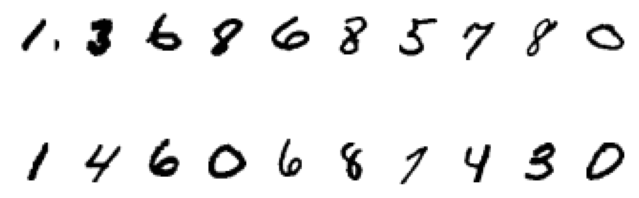

In [10]:
# Test via calling
print_digit_images()

### Baseline Visualization 2 Observations

This section displays a grid of images from the X_train dataset, along with their corresponding labels from the y_train dataset. It arranges the images in rows and columns, with a specified number of images per row. This makes it easier for us to visualize the images and how it is going to be seen.

### Task 2.4 - Data Augmentation

Purpose of data augmentation is to introduce variability to the datasets that will be used for image classification workloads. Introducing variability will allow the model to hone in on different nuances of a given digit based on the following attributes: Greyscale, image rotation, image shift, zoom, etc.

In [10]:
datagen = ImageDataGenerator(
    # rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    rotation_range=35,
    width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
    zoom_range=0.2,  # randomly zoom into images
    fill_mode='nearest'  # fill in newly created pixels, which can appear after a rotation or a width/height shift
)


In [11]:
# Fit the datagen object to our training data
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

### Task 2.5 - Data Loaders

In [12]:
augmented_data_loader = datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), y_train, batch_size=32)

### Data Loader Explanation

Data Loaders will help us automatically predefined image augmentation to our training images in X_train, and prepares them in batches for model training later in the process. 

**FLow()** This function is what applies the augmentations to prepare for feeding into our future model

**batch_size**: We will be preparing images in batches of 32 vs 1 image at a time. This should make model training more efficient.

### Task 2.6 - Visualize the augmented images

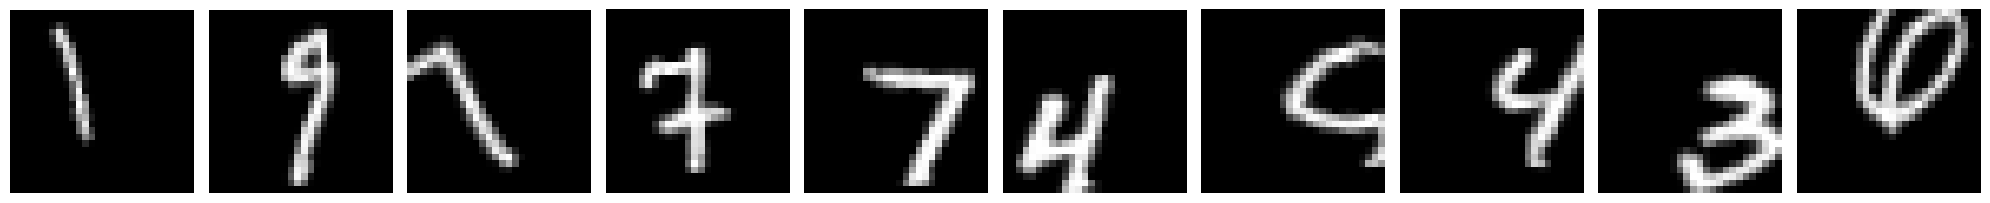

In [13]:
# Generate a batch of augmented images from the dataset
augmented_images = next(datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), batch_size=10))

# Plot the augmented images
fig, axes = plt.subplots(1, 10, figsize=(20, 3))
for img, ax in zip(augmented_images, axes):
    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()


### Data augmentation explanation 

This is the process of artificially increasing the size and diversity of your training dataset by applying various transformations to the existing data. This helps with an improved model performance and generalization. 

    1. These transformations include rotations, translations, flips, scaling, cropping, and more. 
    2.The goal of data augmentation is to improve the generalization ability of the model by exposing it to a wider range of variations in the input data.

    You can do this through keras and tensorflow

### Task 2.7 -Save Preprocessed Data for Subsequent Training

Since we have created a **augmented_data_loader** object, we will pass this object in to any model.fit() functions later on. 

---
---

## **Task 3: Designing the CNN Architecture**  

**Objective:** Design a simple Convolutional Neural Network architecture suitable for handwritten digit recognition.  

**Activities:**

1. Define the CNN layers, including convolutional, activation, pooling, and fully connected layers.  
2. Choose activation functions and initialize weights.  
3. Configure the optimizer, loss function, and metrics for model compilation.  
4. Summarize the model to visualize the architecture and parameters.

**Estimated Completion Time:** 90 minutes

### Tensorboard Log Directory Creation

In [14]:
# Create the log directory for tensorboard logs, will be used later in Task 5
log_dir = "../Logs/fit/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_images=True)

### Arvind's Neural Network Architecture

In [15]:
def build_model():
    '''
    Build a Sequential model with regular densely-connected NN layers.
    Return the constructed model. 
    ''' 
    input_layer = Input(shape = (28, 28, 1))  # 1 is the count of channels (no RGB)

    # Hidden layers
    Layer_1 = Conv2D(64, kernel_size=(3, 3), activation="relu", name='CL1')(input_layer)
    
    BNorm_1 = BatchNormalization()(Layer_1)
    
    Layer_2 = Conv2D(64, kernel_size=(3, 3), activation="relu", name='CL2')(BNorm_1)
    
    BNorm_2 =  BatchNormalization()(Layer_2)
   
    Layer_3 = Conv2D(64, kernel_size=(3, 3), activation="relu", name='CL3')(BNorm_2)
    
    BNorm_3 = BatchNormalization()(Layer_3) #this one was the original
    
    #maxpool_layer1 = MaxPooling2D()(Layer_3)
    
    Layer_4 = Conv2D(32, kernel_size=(3, 3), activation="relu", name='CL4')(BNorm_3)
    
    BNorm_4 = BatchNormalization()(Layer_4)
    
    Layer_5 = Conv2D(16, kernel_size=(3, 3), activation="relu", name='CL5')(BNorm_4)
    
    BNorm_5 = BatchNormalization()(Layer_5)
    
    Layer_6 = Conv2D(8, kernel_size=(3, 3), activation="relu", name='CL6')(BNorm_5)
    
    BNorm_6 = BatchNormalization()(Layer_6)

    maxpool_final = MaxPooling2D()(BNorm_6)

    Flatten_layer = layers.Flatten()(maxpool_final)

    # The model's output layer
    layers.Dropout(0.5)
    Output_Layer = Dense(10, activation='softmax')(Flatten_layer)
    
    model = Model(inputs = input_layer, outputs = Output_Layer)
  
    # model = Sequential([Layer_1, Layer_2, Layer_3, maxpool_layer1, 
    #                     Layer_4, Layer_5, Layer_6, maxpool_final,
    #                     Flatten_layer, Output_Layer])

    model.summary()

    return model


In [16]:
def compile_model(model):
  '''
    Compile the pre-built model with the model hyperparameters.
    Return the compiled model
  '''
  model.compile(    
      #optimizer=keras.optimizers.RMSprop(), 
      optimizer=SGD(learning_rate=1e-2, momentum=0.9, nesterov=True),

      # The loss function that we need to minimize
      loss=keras.losses.SparseCategoricalCrossentropy(),  # we have a lot of "holes" in the dataset (the black pixels with a value of 0)
     
      # The metrics (can be more than one) to monitor
      metrics=[keras.metrics.SparseCategoricalAccuracy()], # The "dangling" comma , before the closing bracket is good practice ...
  )

  return model

In [17]:
def train(model):
  '''
    Train the model with a fixed number of epochs 
    Return the history (log)
  '''
  # In a CPU-only CoLab environment, training may take about 5 minutes, give or take, so be patient and wait until the training is done ... 
  history = model.fit(augmented_data_loader, batch_size = 128, epochs = 15, verbose=1,callbacks= tensorboard_callback ,validation_data = (X_validation, y_validation))

  return history

### Tim's Neural Network Architecture

Below are functions used to build, compile and train Tim's Model using the Neural Network design. I opted to have multple CNN followed by a batch normalization layer before proceeding to another CNN Layer in hope to validate measure performance between mine and Arvind's model architecture. I wanted to use pooling layers to help reduce the number of parameters in hopes to reduce overfitting my model. I also wanted to include one batch normalization layer to help adjust parameters before being fed into the second batch of CNN's. Lastly, I wanted to include a dropout layer with a threshold of .2 to prevent overfitting.

In [18]:
def tim_build_model():
    '''
    Build a Sequential model with regular densely-connected NN layers.
    Return the constructed model. 
    ''' 
    input_layer = Input(shape = (28, 28, 1))  # 1 is the count of channels (no RGB)

    # Hidden layers
    Layer_1 = Conv2D(128, kernel_size=(3, 3), activation="relu", name='CL1')(input_layer)
    Layer_2 = layers.MaxPooling2D(pool_size=(2, 2))(Layer_1)

    BNorm_1 = BatchNormalization()(Layer_2)

    Layer_3 = Conv2D(64, kernel_size=(3, 3), activation="relu", name='CL4')(BNorm_1)
    Flatten_layer = layers.Flatten()(Layer_3)
    layers.Dropout(0.2)

    Output_Layer = Dense(10, activation='softmax')(Flatten_layer)
    
    model = Model(inputs = input_layer, outputs = Output_Layer)

    model.summary()

    return model

In [28]:
def tim_compile_model(model):
  '''
    Compile the pre-built model with the model hyperparameters.
    Return the compiled model
  '''
  model.compile(    
      #optimizer=keras.optimizers.RMSprop(), 
      optimizer=SGD(learning_rate=1e-2, momentum=0.9, nesterov=True),

      # The loss function that we need to minimize
      loss=keras.losses.SparseCategoricalCrossentropy(),  # we have a lot of "holes" in the dataset (the black pixels with a value of 0)
     
      # The metrics (can be more than one) to monitor
      metrics=[keras.metrics.SparseCategoricalAccuracy()], # The "dangling" comma , before the closing bracket is good practice ...
  )

  return model

In [29]:
def tim_train(model):
  '''
    Train the model with a fixed number of epochs 
    Return the history (log)
  '''
  epochs = 20
  # In a CPU-only CoLab environment, training may take about 5 minutes, give or take, so be patient and wait until the training is done ... 
  #history = model.fit(augmented_data_loader, batch_size=128, epochs=epochs, validation_data = (X_validation,y_validation), callbacks= tensorboard_callback, verbose =1)
  history = model.fit(augmented_data_loader, batch_size=128, epochs=epochs,callbacks= tensorboard_callback, validation_data = (X_validation,y_validation), verbose =1)
  return history


## **Task 4: Model Training and Evaluation**  

**Objective:** Train the CNN with the training data and evaluate its performance on the test set.  

**Activities:**

1. Integrate TensorBoard callbacks for real-time tracking of training metrics.
2. Set up callbacks for model checkpoints, early stopping, and learning rate adjustments.  
3. Train the model with the training set while validating on the validation set.  
4. Use TensorBoard to plot training and validation loss and accuracy.  
5. Evaluate the model on the test set to assess its generalization capability.  
6. Perform error analysis by reviewing misclassified images to understand the model's weaknesses.  
7. Test the model with external images (e.g., hand-drawn digits) to further assess its performance.

**Estimated Completion Time:** 300 minutes

### Arvind's Architecture Test on Augmented Data

In [ ]:
# Seed the random generator for reproducible results
tf.keras.utils.set_random_seed(2424)

# Trigger the sequence ..
model = build_model()
model = compile_model(model)
history = train(model)

### Tim's Architecture Test on Augmented Data

In [ ]:
# Tim Test- Updated Neural Network Architecture on Augmented Data

# Seed the random generator for reproducible results
tf.keras.utils.set_random_seed(2424)

# Trigger the sequence ..
model2_aug = tim_build_model()
model2_aug = tim_compile_model(model2_aug)
history = tim_train(model2_aug)

## Model 2 Performance Observations:

1. **Model Learning**: The model's loss function is decreasing over time, with the accuracy increasing overtime. 
2. **Validation Loss and Accuracy**: the validation sparse categorical accuracy continues to increase, reaching up to 92.44% Accuracy and loss function of 0.245. This is an ideal scenario where the loss function value decreases while the accuracy increases.
3. **Difference in Performance on Scaled vs Augmented Data**: Tim's model performs better on scaled data compared to augmented data. This could be explained by the fact that augmented data introduces variability in the dataset, making it more difficult for a ML model to accurately classify an image. Scaled data resembles the data more accurately, making it easier for the model to classify scaled data.
4. **Variance in metrics** - There is still variance in the accuracy and loss values as the model progressess through epochs. This suggests that the model can be further tuned to optimize its prediction capabilities.

### Potential Next Steps (Time Permitting)

1. Adjust size at the final dense layer before the output layer
2. Reduce the amount of CNN layers I have (currently, I haave 6 CNN layers)
3. Reduce the amount of Pooling layers
4. Experiment with increasing neurons at each layer vs decreasing

### Evaluate Model1_Augmented Performance on Validation and y validation

In [ ]:
model2_aug.evaluate(X_validation, y_validation)

### Interpretation

Model 2 is performing at an acceptable rate on validation data (data it has never seen before) with a accuracy metric of 94.71. There is still room for improvement.

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.title('Sparse Categorical Accuracy Score over Epochs - Model 2 (augmented data)')
plt.show()

### Visualization Observation
This is a way to visualize the models performance at each pass through the neural network. You can see the typical behavior of a low accuracy rating after the first pass, and a significant increase of sparse_categorical_accuracy_score for epoch 2. Lastly, we can see the model's score stalling out as annotated by the decreased slope of the line at around epch 4

---
---


## **Task 5: Results Analysis and Model Tuning**  

**Objective:** Analyze the results and refine the model for better performance.  

**Activities:**

1. Use TensorBoard to perform detailed analysis of model performance, including confusion matrices and histograms of model weights.
2. Investigate layer activations and feature maps to understand what the model is learning.
3. Experiment with different architectures using `model.get_config()` and hyperparameters to improve performance.
4. Apply techniques like dropout and batch normalization to mitigate overfitting.
5. Evaluate the effects of data augmentation on model robustness using TensorBoard.
6. Conduct ablation studies, using TensorBoard to track and compare results.

**Estimated Completion Time:** 240 minutes



In [23]:
%load_ext tensorboard
# %reload_ext tensorboard
%tensorboard --logdir {log_dir}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 35284), started 0:00:24 ago. (Use '!kill 35284' to kill it.)

### Tensorboard Visaulization Observations

1. **Model Performance Over Epochs**: The epoch_loss graph shows a decreasing trend in loss value as the number of epochs increases, indicating that the model is learning and performance is improving over time. The loss curve appears to flatten as it approaches 18 epochs, suggesting that additional epochs might not yield significant improvement and the model may be nearing convergence.
2. **Learning Rate and Parameter Tuning**: To increase model accuracy, I should look into the learning rates and regularization techniques. 
3. **Peaks of Histograms**: All my histograms have sharp peaks. We can see that the there are still some variance in later epochs which is further confirmed by the model accuracy rate. This could be used to include batch normalization  or using differnt activation functions

### Print out model parameters to review attributes and how they contributed to model performance

### Model Tuning with Hyperopt and MLFlow

In [ ]:
# If this configuration works, 
# the issue may be the way we are passing infomration from the search space 
search_space_arvind = {
    #'num_neurons1': hp.quniform('filters1', 16, 512, 8),
    'num_neurons1': hp.choice('filters1', [16, 32]),
    'num_neurons2': hp.choice('filters2', [32, 64]),
    'num_neurons3': hp.choice('filters3', [32, 64]),
    'num_neurons4': hp.choice('filters4', [64, 128]),
    'num_neurons5': hp.choice('filters5', [64, 128]),
    'num_neurons6': hp.choice('filters6', [128, 256]),
    'activation_fn': hp.choice('activation1', ['relu', 'leaky_relu','swish']),
    'dropout_rate': hp.uniform('dropout_rate', 0.2, 0.7)
}

In [ ]:
# Define our objective function for our experiment
def objective_arvind(params):
    # Automatic logging of metrics, parameters. 
    mlflow.tensorflow.autolog()
    with mlflow.start_run():

        # Set up TensorBoard logging
        log_dir = os.path.join("tb_logs", f"run_{mlflow.active_run().info.run_id}")
        tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

        input_layer = Input(shape = (28, 28, 1))  # 1 is the count of channels (no RGB)

        # Hidden layers
        #Layer_1 = Conv2D(params['num_neurons1'], params['activation_fn'],kernel_size=(3, 3), name='CL1')(input_layer)
        Layer_1 = Conv2D(filters=params['num_neurons1'], kernel_size=(3, 3), activation=params['activation_fn'],name='CL1')(input_layer)
    
        BNorm_1 = BatchNormalization()(Layer_1)
        
        Layer_2 = Conv2D(filters=params['num_neurons2'], kernel_size=(3, 3), activation=params['activation_fn'], name='CL2')(BNorm_1)
    
        BNorm_2 =  BatchNormalization()(Layer_2)
   
        Layer_3 = Conv2D(filters=params['num_neurons3'], kernel_size=(3, 3), activation=params['activation_fn'], name='CL3')(BNorm_2)
    
        BNorm_3 = BatchNormalization()(Layer_3) #this one was the original
    
        Layer_4 = Conv2D(filters=params['num_neurons4'], kernel_size=(3, 3), activation=params['activation_fn'], name='CL4')(BNorm_3)
    
        BNorm_4 = BatchNormalization()(Layer_4)
    
        Layer_5 = Conv2D(filters=params['num_neurons5'], kernel_size=(3, 3), activation=params['activation_fn'], name='CL5')(BNorm_4)
    
        BNorm_5 = BatchNormalization()(Layer_5)
    
        Layer_6 = Conv2D(filters=params['num_neurons6'], kernel_size=(3, 3), activation=params['activation_fn'], name='CL6')(BNorm_5)
    
        BNorm_6 = BatchNormalization()(Layer_6)
        
        maxpool_final = MaxPooling2D()(BNorm_6)

        Flatten_layer = layers.Flatten()(maxpool_final)

        # The model's output layer
        layers.Dropout(rate=params['dropout_rate'])
        Output_Layer = Dense(10, activation='softmax')(Flatten_layer)
    
        model = Model(inputs = input_layer, outputs = Output_Layer)

        # model.summary()

        # Compile the model
        model.compile(    
            #optimizer=keras.optimizers.RMSprop(), 
            optimizer=SGD(learning_rate=1e-2, momentum=0.9, nesterov=True),
            # The loss function that we need to minimize
            loss=keras.losses.SparseCategoricalCrossentropy(),  # we have a lot of "holes" in the dataset (the black pixels with a value of 0)
            # The metrics (can be more than one) to monitor
            metrics=[keras.metrics.SparseCategoricalAccuracy()]) # The "dangling" comma , before the closing bracket is good practice ...
        epochs = 14
        # In a CPU-only CoLab environment, training may take about 5 minutes, give or take, so be patient and wait until the training is done ... 
        model.fit(augmented_data_loader, batch_size=128, epochs=epochs, validation_data= (X_test,y_test), callbacks= tensorboard_callback, verbose =1)

        score = model.evaluate(X_test, y_test, verbose=0)

        mlflow.log_param("Num Neurons in first CN Layer", params['num_neurons1'])
        mlflow.log_param("Num Neurons in second CN Layer", params['num_neurons2'])
        mlflow.log_param("Num Neurons in third CN Layer", params['num_neurons3'])
        mlflow.log_param("Num Neurons in fourth CN Layer", params['num_neurons4'])
        mlflow.log_param("Num Neurons in fifth CN Layer", params['num_neurons5'])
        mlflow.log_param("Num Neurons in sixth CN Layer", params['num_neurons6'])
        mlflow.log_param("dropout_rate", params['dropout_rate'])

        # Log TensorBoard logs as MLflow artifacts
        mlflow.log_artifacts(log_dir, "tensorboard_logs")
        return {'loss': -score[1], 'status': STATUS_OK, 'model': model}

In [25]:
# Define the search_space dictionary that will be later used for 
# this dictionary will be used in hyperopts fmin() where it will attempt to identify the optimized parameters based on the values of our search_space dictionary

search_space_tim = {
    'num_neurons1': hp.choice('filters1', [16,64,128]),
    'num_neurons2': hp.choice('filters2', [16,64,128]),
    'dropout_rate': hp.choice('dropout_rate', [0.2,0.3,0.4,0.5,0.6,0.7]),
    'activation_fn': hp.choice('activation1', ['relu', 'leaky_relu','gelu'])
}

In [24]:
# Define our objective function for our experiment
def objective_tim(params):
    mlflow.set_tracking_uri("file:///C:/Users/timot/OneDrive/Code/Python/TechEx_Project_2/Notebooks/mlruns")
    # Automatic logging of metrics, parameters. 
    mlflow.tensorflow.autolog()
    with mlflow.start_run():

        # Set up TensorBoard logging
        log_dir = os.path.join("tb_logs", f"run_{mlflow.active_run().info.run_id}")
        tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

        # Build our current model
        input_layer = Input(shape = (28, 28, 1))  # 1 is the count of channels (no RGB)

        # Hidden layers
        Layer_1 = Conv2D(filters=params['num_neurons1'], kernel_size=(3, 3), activation=params['activation_fn'], name='CL1')(input_layer)
        Layer_2 = layers.MaxPooling2D(pool_size=(2, 2))(Layer_1)
        BNorm_1 = BatchNormalization()(Layer_2)

        Layer_3 = Conv2D(filters=params['num_neurons2'], kernel_size=(3, 3), activation=params['activation_fn'], name='CL4')(BNorm_1)
        Flatten_layer = layers.Flatten()(Layer_3)
        layers.Dropout(rate=params['dropout_rate'])

        Output_Layer = Dense(10, activation='softmax')(Flatten_layer)
    
        model = Model(inputs = input_layer, outputs = Output_Layer)

        # model.summary()
        # Compile the model
        model.compile(    
            #optimizer=keras.optimizers.RMSprop(), 
            optimizer=SGD(learning_rate=1e-2, momentum=0.9, nesterov=True),
            # The loss function that we need to minimize
            loss=keras.losses.SparseCategoricalCrossentropy(),  # we have a lot of "holes" in the dataset (the black pixels with a value of 0)
            # The metrics (can be more than one) to monitor
            metrics=[keras.metrics.SparseCategoricalAccuracy()]) # The "dangling" comma , before the closing bracket is good practice ...
        epochs = 19
        # In a CPU-only CoLab environment, training may take about 5 minutes, give or take, so be patient and wait until the training is done ... 
        model.fit(augmented_data_loader, batch_size=128, epochs=epochs, validation_data= (X_test, y_test), callbacks= tensorboard_callback, verbose =1)

        score = model.evaluate(X_test, y_test, verbose=0)

        mlflow.log_param("Num Neurons in first CN Layer", params['num_neurons1'])
        mlflow.log_param("Num Neurons in second CN Layer", params['num_neurons2'])
        mlflow.log_param("dropout_rate", params['dropout_rate'])

        # Log TensorBoard logs as MLflow artifacts
        mlflow.log_artifacts(log_dir, "tensorboard_logs")
        return {'loss': -score[1], 'status': STATUS_OK, 'model': model}

In [ ]:
# Trials Arvind

trials = Trials()
best_arvind = fmin(
fn=objective_arvind,
space=search_space_arvind,
algo= tpe.suggest,
max_evals=5,
trials = trials
)

In [ ]:
# Test - Tim
trials_tim = Trials()
best_tim = fmin(
    fn=objective_tim,
    space=search_space_tim,
    algo= tpe.suggest,
    max_evals=5,
    trials = trials_tim
)

  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

2024/04/15 10:32:56 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.



Epoch 1/19                                           

  0%|          | 0/5 [00:02<?, ?trial/s, best loss=?]

c:\Users\timot\miniconda3\envs\TechEx_Project2\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



   1/1500 ━━━━━━━━━━━━━━━━━━━━ 47:17 2s/step - loss: 2.7657 - sparse_categorical_accuracy: 0.0938
   3/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - loss: 2.9934 - sparse_categorical_accuracy: 0.0972
   4/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - loss: 3.0139 - sparse_categorical_accuracy: 0.1022
   5/1500 ━━━━━━━━━━━━━━━━━━━━ 1:03 42ms/step - loss: 3.0182 - sparse_categorical_accuracy: 0.1018
   7/1500 ━━━━━━━━━━━━━━━━━━━━ 1:01 41ms/step - loss: 2.9774 - sparse_categorical_accuracy: 0.1082
   9/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 40ms/step - loss: 2.9422 - sparse_categorical_accuracy: 0.1135 
  11/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 39ms/step - loss: 2.9146 - sparse_categorical_accuracy: 0.1162
  12/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 40ms/step - loss: 2.9021 - sparse_categorical_accuracy: 0.1176
  13/1500 ━━━━━━━━━━━━━━━━━━━━ 1:00 41ms/step - loss: 2.8895 - sparse_categorical_accuracy: 0.1187
  14/1500 ━━━━━━━━━━━━━━━━━━━━ 1:06 45ms/step - loss: 2.8772 - sparse_categorical_accuracy: 0.1198
  16/1500 ━━━━━

In [ ]:
print(best_tim)

### Hyperopt output - Tim 

loss: 0.2399 - sparse_categorical_accuracy: 0.9261 - val_loss: 0.1354 - val_sparse_categorical_accuracy: 0.9605
loss: 0.2315 - sparse_categorical_accuracy: 0.9301 - val_loss: 0.1142 - val_sparse_categorical_accuracy: 0.9645
loss: 0.1990 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.1135 - val_sparse_categorical_accuracy: 0.9677
loss:0.2031 - sparse_categorical_accuracy: 0.9371 - val_loss: 0.1093 - val_sparse_categorical_accuracy: 0.9685
loss: 0.2094 - sparse_categorical_accuracy: 0.9347 - val_loss: 0.1117 - val_sparse_categorical_accuracy: 0.9687

**Based on the output above, this says that the optimal activation function at CNN layer 1 is 'gelu', dropout rate of 0.7, number of nuerons at layer 1 of 64 and 64 neurons at cnn layer 2.**

In [26]:
!mlflow ui

^C


---
---


In [27]:
def tim_build_model_best():
    '''
    Build a Sequential model with regular densely-connected NN layers.
    Return the constructed model. 
    ''' 
    input_layer = Input(shape = (28, 28, 1))  # 1 is the count of channels (no RGB)

    # Hidden layers
    Layer_1 = Conv2D(64, kernel_size=(3, 3), activation="gelu", name='CL1')(input_layer)
    Layer_2 = layers.MaxPooling2D(pool_size=(2, 2))(Layer_1)

    BNorm_1 = BatchNormalization()(Layer_2)

    Layer_3 = Conv2D(64, kernel_size=(3, 3), activation="relu", name='CL4')(BNorm_1)
    Flatten_layer = layers.Flatten()(Layer_3)
    layers.Dropout(0.7)

    Output_Layer = Dense(10, activation='softmax')(Flatten_layer)
    
    model = Model(inputs = input_layer, outputs = Output_Layer)

    model.summary()

    return model

In [30]:
# Seed the random generator for reproducible results
tf.keras.utils.set_random_seed(2424)

# Trigger the sequence ..
model3 = tim_build_model_best()
model2 = tim_compile_model(model3)
history = tim_train(model3)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CL1 (Conv2D)                    │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CL4 (Conv2D)                    │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        77,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,274 (450.29 KB)

 Trainable params: 115,146 (449.79 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/20


c:\Users\timot\miniconda3\envs\TechEx_Project2\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - loss: 1.3813 - sparse_categorical_accuracy: 0.5530 - val_loss: 0.4447 - val_sparse_categorical_accuracy: 0.8627
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - loss: 0.5003 - sparse_categorical_accuracy: 0.8439 - val_loss: 0.2412 - val_sparse_categorical_accuracy: 0.9304
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - loss: 0.3923 - sparse_categorical_accuracy: 0.8810 - val_loss: 0.1473 - val_sparse_categorical_accuracy: 0.9582
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - loss: 0.3331 - sparse_categorical_accuracy: 0.8995 - val_loss: 0.1490 - val_sparse_categorical_accuracy: 0.9587
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 41ms/step - loss: 0.3143 - sparse_categorical_accuracy: 0.9048 - val_loss: 0.1869 - val_sparse_categorical_accuracy: 0.9466
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 104s 69ms/step - loss: 0.2927 - sparse_categorical_accuracy: 0.9113 - val_loss: 0.1751 - val_sparse_categorical_accurac

In [32]:
model3.evaluate(X_validation,y_validation)

  1/375 ━━━━━━━━━━━━━━━━━━━━ 56s 152ms/step - loss: 0.1084 - sparse_categorical_accuracy: 0.9375

375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.1429 - sparse_categorical_accuracy: 0.9578


[0.12587770819664001, 0.9629166722297668]

### Observations

Comparing output at epoch 19 and epoch 20 for model3, the model's lowest loss score was .1226 and highest validation accuracy of 96.47% (Epoch 19). The model continued to epoch 20. This suggests that we should include an earlystopping callback in our model. Additionally, the hypertuned parameters provided by Hyperopt showed favorable and  significant performance increase to my original model.


## **Task 6: Model Deployment and Documentation**  

**Objective:** Prepare the model for deployment using MLflow and document the project for reproducibility and sharing. Create and test an API endpoint for the model using Postman.

**Activities:**

1. Convert the trained model into a MLflow-compatible format and log the model in MLflow.
2. Set up MLflow tracking server to manage and store model artifacts.
3. Develop a Flask or FastAPI application that loads the MLflow model and creates an API endpoint for making predictions.
4. Test the API endpoint locally to ensure it is working as expected.
5. Use MLflow to package the API application into a Docker container for easy deployment and scaling.
6. Write comprehensive documentation, detailing the steps for model conversion, MLflow integration, API usage, and deployment process.
7. Use Postman to create and send requests to the deployed API endpoint, validating the model's responses and functionality.
8. Create a GitHub repository to host the project code, MLflow tracking information, documentation, and deployment instructions.

**Estimated Completion Time:** 240 minutes

---
---


### Project Insights

Based on the comparison between two separate models with different architectures, Tim's model emerged as the more effective one within the given time constraints. Tim's model employed multiple convolutional neural network (CNN) layers followed by batch normalization and dropout layers to mitigate overfitting. Pooling layers were strategically utilized to reduce parameter count and potentially enhance performance.

After assessing our initial model's performance, we decided to refine its parameters using Hyperopt to maximize effectiveness. Our most notable outcome emerged during **epoch 20**, where we achieved a **validation sparse categorical accuracy of 0.9479 and a validation loss of 0.3027**. Leveraging Hyperopt, we delved into a parameter space encompassing neuron counts, dropout rates, and activation functions, seeking optimal configurations. This iterative process aimed to elevate our model's overall performance. Ultimately, Hyperopt revealed key parameters, including a **dropout rate of 0.7, 'gelu' activation for the initial CNN layer, and 64 neuron counts tailored for each layer**.

Upon incorporating these refined parameters into the model, subsequent evaluation revealed notable enhancements in validation metrics. **This resulted in a validation sparse categorical accuracy of 0.9647 and a validation loss of 0.1259**. *A closer examination of the overall distribution of epochs showcased reduced variance across runs. This contrasted with earlier iterations, where each epoch exhibited a wider range of values*.

*The comparison between the initial and optimized models underscores the significant impact of parameter refinement through Hyperopt*. Tim's model, characterized by multiple CNN layers with batch normalization and dropout layers, laid the baseline for subsequent enhancements. With Hyperopt, we explored parameter spaces, yielding a notable improvement in validation metrics. Notably, our optimized model achieved a validation sparse categorical accuracy of 0.9647 and a validation loss of 0.1259, marking a substantial advancement from the initial performance metrics. This process not only elevated the model's effectiveness but also mitigated variance across epochs, indicative of enhanced stability and consistency. 
